In [171]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('articles_data.csv')


In [173]:
df.columns

Index(['Unnamed: 0', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'top_article', 'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count'],
      dtype='object')

<AxesSubplot:>

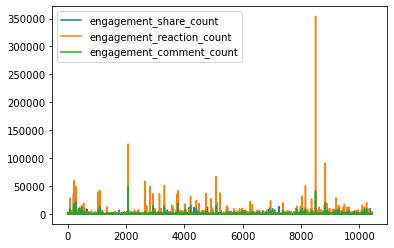

In [174]:
#only keeping shares, reactions and comments - NOT plugins comments...
df[['engagement_share_count','engagement_reaction_count','engagement_comment_count']].plot()

In [175]:
#function to do rough cleaning of data



def text_preprocessing(text):
    text = "".join([c.lower() for c in text]) # lowercase
    return text

def drop_na(df):
    df = df.dropna(axis = 0)
    df = df[~(df['description'] == 'nan')]
    return df


def preprocessing(df):
    #delete rows from source 460.0
    df = df.drop(df[df.source_name == "460.0"].index)
    #make descriptions lower case
    df['description'] = df['description'].astype(str).apply(text_preprocessing)
    
    #select attributes of interest
    df = df[['description', 'url_to_image', 'engagement_reaction_count', 'engagement_comment_count', 'engagement_share_count']]
    
    #drop nan's
    df = drop_na(df)
    
    #calculate engagement total 
    df['engagement'] = df['engagement_reaction_count'] + df['engagement_comment_count'] + df['engagement_share_count']
    #calculate engagement in log domain
    df['engagement_log'] = np.log(df['engagement'] + 0.0001)
    
    df = df[['description','engagement', 'engagement_log', 'url_to_image']].copy()
    
    return df

In [176]:
df_clean = preprocessing(df)

In [177]:
print("Original: ", df.shape)
print("cleaned: ", df_clean.shape)

Original:  (10437, 15)
cleaned:  (9653, 4)


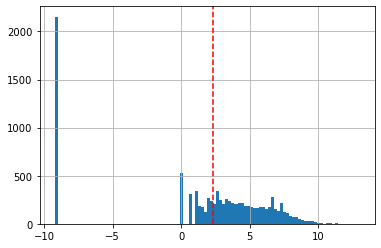

In [179]:
ax = df_clean.engagement_log.hist(bins = 100)
ax.axvline(np.log(10), color="red", linestyle="--")

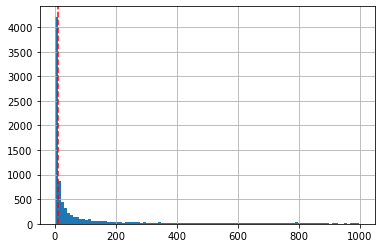

In [181]:
ax = df_clean[df_clean.engagement < 1000].engagement.hist(bins = 100)
ax.axvline(10, color="red", linestyle="--")

In [148]:
#split engagement into two classes (below and above 10 engagements)
df_clean['engagement_binary'] = (df_clean['engagement_log'] > np.log(10)).astype(int)

<AxesSubplot:>

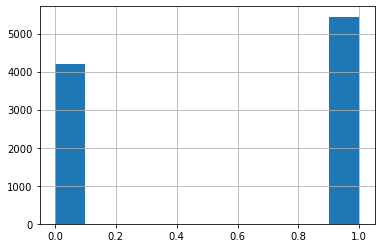

In [149]:
df_clean.engagement_binary.hist()

In [151]:
(sum(df_clean.engagement_binary))/len(df_clean.engagement_binary)

0.5637625608619082

In [159]:
from sklearn.model_selection import train_test_split
y = np.array(df_clean['engagement_binary'])
X = np.array(df_clean[['description', 'url_to_image']])
X_par, X_test, y_par, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_par, y_par, test_size=0.10, random_state=42)

In [163]:
import pickle

pickle.dump(X_train, open("X_train.p", "wb"))
pickle.dump(y_train, open("y_train.p", "wb"))
pickle.dump(X_val, open("X_val.p", "wb"))
pickle.dump(y_val, open("y_val.p", "wb"))
pickle.dump(X_test, open("X_test.p", "wb"))
pickle.dump(y_test, open("y_test.p", "wb"))